In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

#### Data

In [21]:
# Load CFashionMNIST dataset
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0,), (1.0,))])

trainset = torchvision.datasets.FashionMNIST(root='data', 
                                             train=True, 
                                             download=True, 
                                             transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=1024, 
                                          num_workers=10, 
                                          shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='data', 
                                            train=False, 
                                            download=True, 
                                            transform=transform)
testloader = torch.utils.data.DataLoader(testset, 
                                         batch_size=1024, 
                                         num_workers=10, 
                                         shuffle=False)

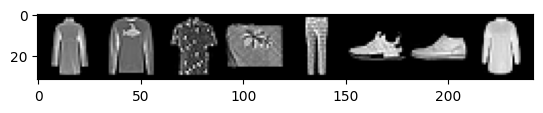

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display the images
def imshow(img):
    #img = img / 255.0
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

for i, (images, labels) in enumerate(trainloader, 0):
    # Plot some images
    imshow(torchvision.utils.make_grid(images[:8]))  # Display 8 images from the batch
    break

#### Model

In [23]:
model = nn.Sequential(
    nn.Flatten(), 
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)


In [24]:
# Generating a random tensor
input_tensor = torch.rand(5, 28, 28)

# Feeding the tensor into the model
output = model(input_tensor)
print(output.shape)

torch.Size([5, 10])


#### Loss, Optimizer, and Evaluation Function

In [25]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), 
                      lr=0.01)

In [26]:
# Function to compute loss and accuracy for test set
def evaluate(model, testloader, loss_fn):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:

            outputs = model(images)
            loss = loss_fn(outputs, labels)
            test_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_loss = test_loss / len(testloader)
    return test_loss, accuracy

In [27]:
test_loss, test_accuracy = evaluate(model, testloader, loss_fn)
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')

test_loss: 2.3081183195114137
test_accuracy: 3.87


#### Train

In [28]:
# some parameter
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
max_epoch = 20

In [29]:
# train
for epoch in range(max_epoch):
    running_loss = 0.0
    running_correct = 0   # to track number of correct predictions
    total = 0             # to track total number of samples

    for i, (inputs, labels) in enumerate(trainloader, 0):

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        running_loss += loss.item()

        # Determine class predictions and track accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()        

    epoch_accuracy = 100 * running_correct / total
    epoch_loss = running_loss / (i + 1)
    test_loss, test_accuracy = evaluate(model, testloader, loss_fn)
    print(f"Epoch [{epoch + 1}/{max_epoch}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
    
    # save for plot
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

Epoch [1/20], Loss: 2.1467, Accuracy: 30.03%, Test Loss: 1.9993, Test Accuracy: 49.81%
Epoch [2/20], Loss: 1.8529, Accuracy: 59.23%, Test Loss: 1.7078, Test Accuracy: 62.39%
Epoch [3/20], Loss: 1.5744, Accuracy: 64.69%, Test Loss: 1.4565, Test Accuracy: 64.17%
Epoch [4/20], Loss: 1.3547, Accuracy: 65.79%, Test Loss: 1.2729, Test Accuracy: 64.94%
Epoch [5/20], Loss: 1.1984, Accuracy: 66.22%, Test Loss: 1.1452, Test Accuracy: 65.17%
Epoch [6/20], Loss: 1.0890, Accuracy: 66.59%, Test Loss: 1.0545, Test Accuracy: 65.60%
Epoch [7/20], Loss: 1.0098, Accuracy: 67.30%, Test Loss: 0.9878, Test Accuracy: 66.58%
Epoch [8/20], Loss: 0.9509, Accuracy: 68.07%, Test Loss: 0.9374, Test Accuracy: 67.41%
Epoch [9/20], Loss: 0.9049, Accuracy: 69.02%, Test Loss: 0.8975, Test Accuracy: 68.06%
Epoch [10/20], Loss: 0.8683, Accuracy: 69.83%, Test Loss: 0.8651, Test Accuracy: 69.17%
Epoch [11/20], Loss: 0.8380, Accuracy: 70.90%, Test Loss: 0.8383, Test Accuracy: 69.95%
Epoch [12/20], Loss: 0.8123, Accuracy: 71

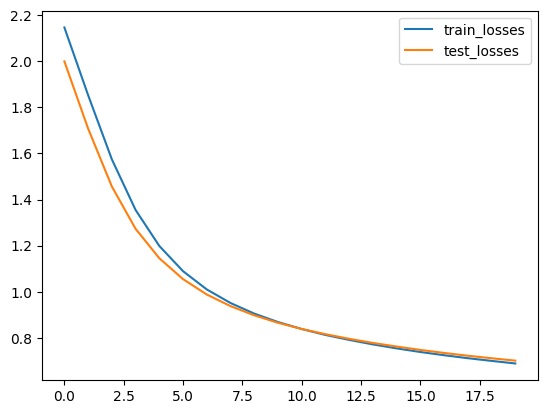

In [30]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='train_losses')
plt.plot(test_losses, label='test_losses')
plt.legend()

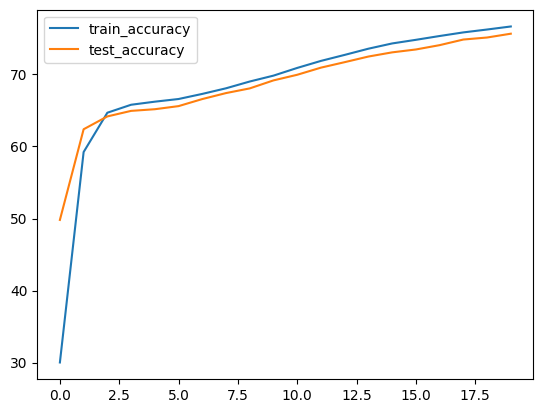

In [31]:
import matplotlib.pyplot as plt

plt.plot(train_accuracies, label='train_accuracy')
plt.plot(test_accuracies, label='test_accuracy')
plt.legend()